# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer and do not have epilepsy.

#### Report 3 - focus on the demographics of the research population; d. focus on Region

In [3]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

# set month for covid reference line
covid = ("2022-03-01")

# set position for covid text
pos_text_covid = ("2022-02-01")

# set month for chart labels
pos_chart_labels = ("2022-09-01")

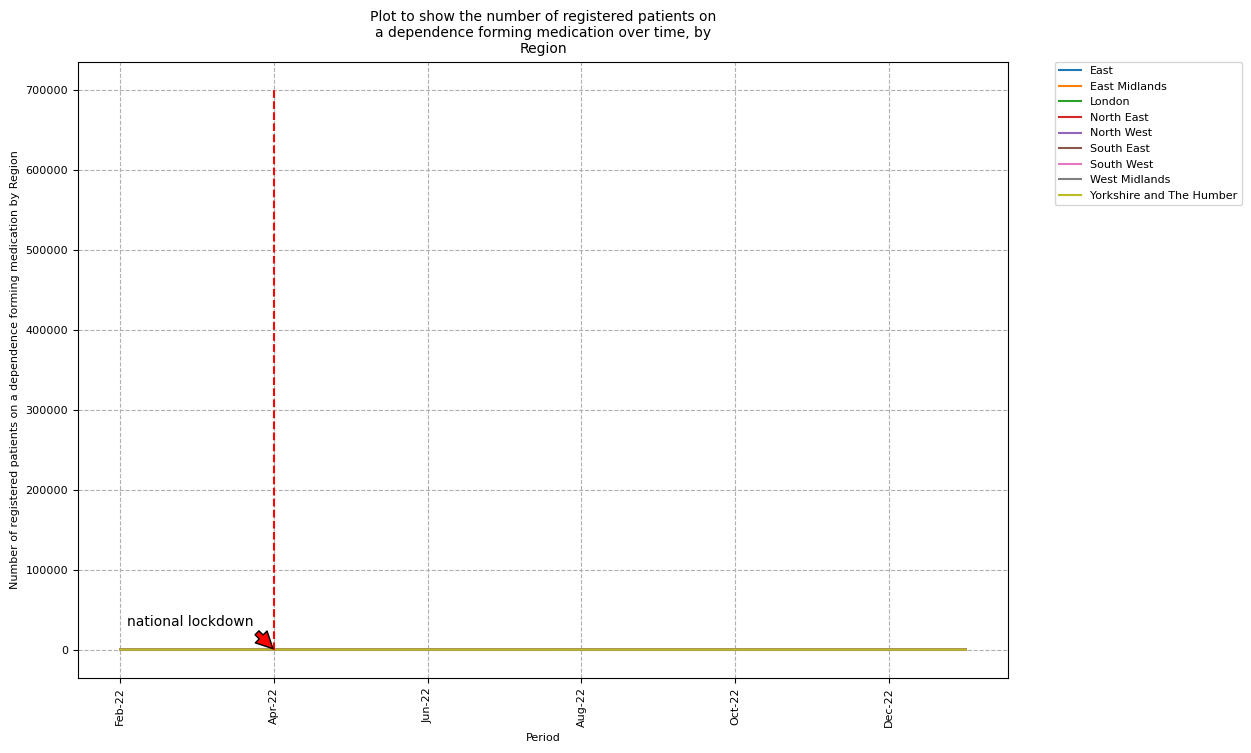

In [23]:
data_measure_dfm_medications_region_rate = pd.read_csv("../output/measure_dfm_medications_by_region_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_region_rate = data_measure_dfm_medications_region_rate.loc[data_measure_dfm_medications_region_rate["region"] != "nan", :]
df_measure_dfm_medications_region_rate = pd.DataFrame.pivot(data_measure_dfm_medications_region_rate, index='date', columns='region', values='research_population')
df_measure_dfm_medications_region_rate.index = pd.to_datetime(df_measure_dfm_medications_region_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_region_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=700000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [6]:
print(tabulate(df_measure_dfm_medications_region_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_region_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22     211              195       410           195           179           186           211              228                         185
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23     193              202       409           211           188           200           200              202                         195


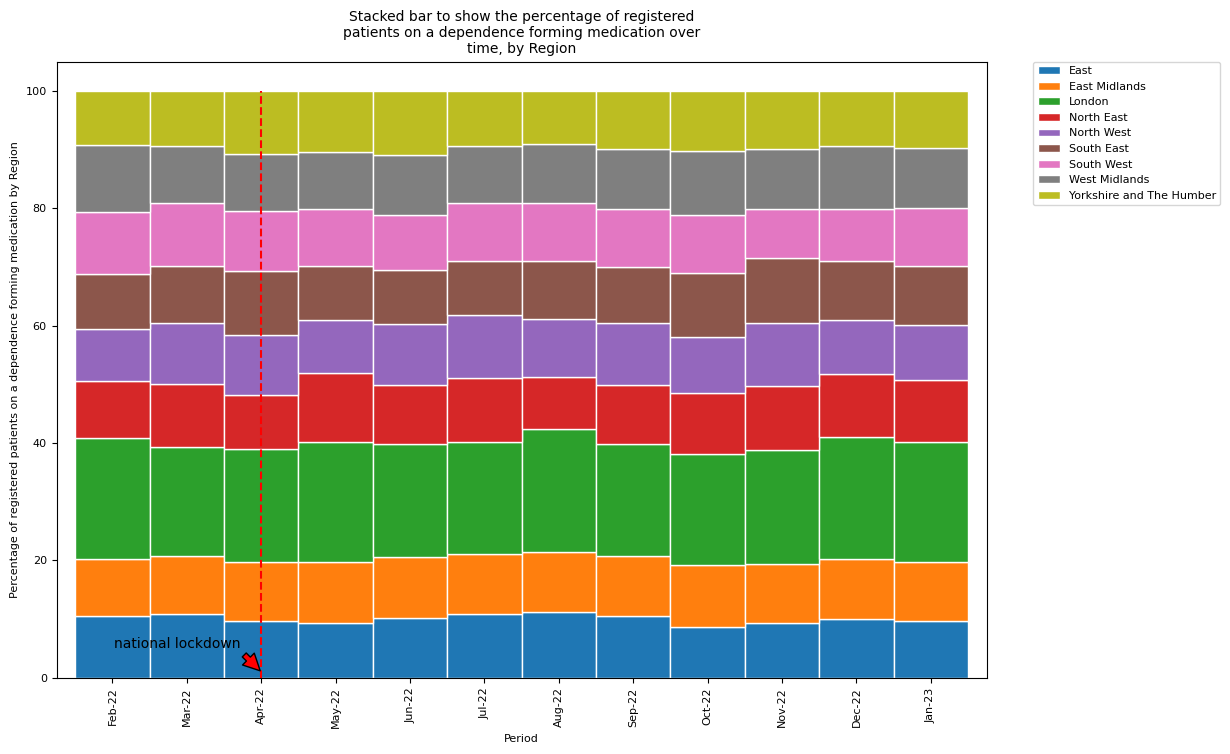

In [7]:
df_region_stacked = pd.DataFrame(df_measure_dfm_medications_region_rate)
df_region_stacked.head()
totrm = df_region_stacked.sum(axis=1)
perrm = df_region_stacked.div(totrm, axis=0).mul(100).round(2)
ax = perrm.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [8]:
print(tabulate(perrm.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrm.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22   10.55             9.75      20.5          9.75          8.95           9.3         10.55             11.4                        9.25
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23    9.65             10.1     20.45         10.55           9.4            10            10             10.1                        9.75


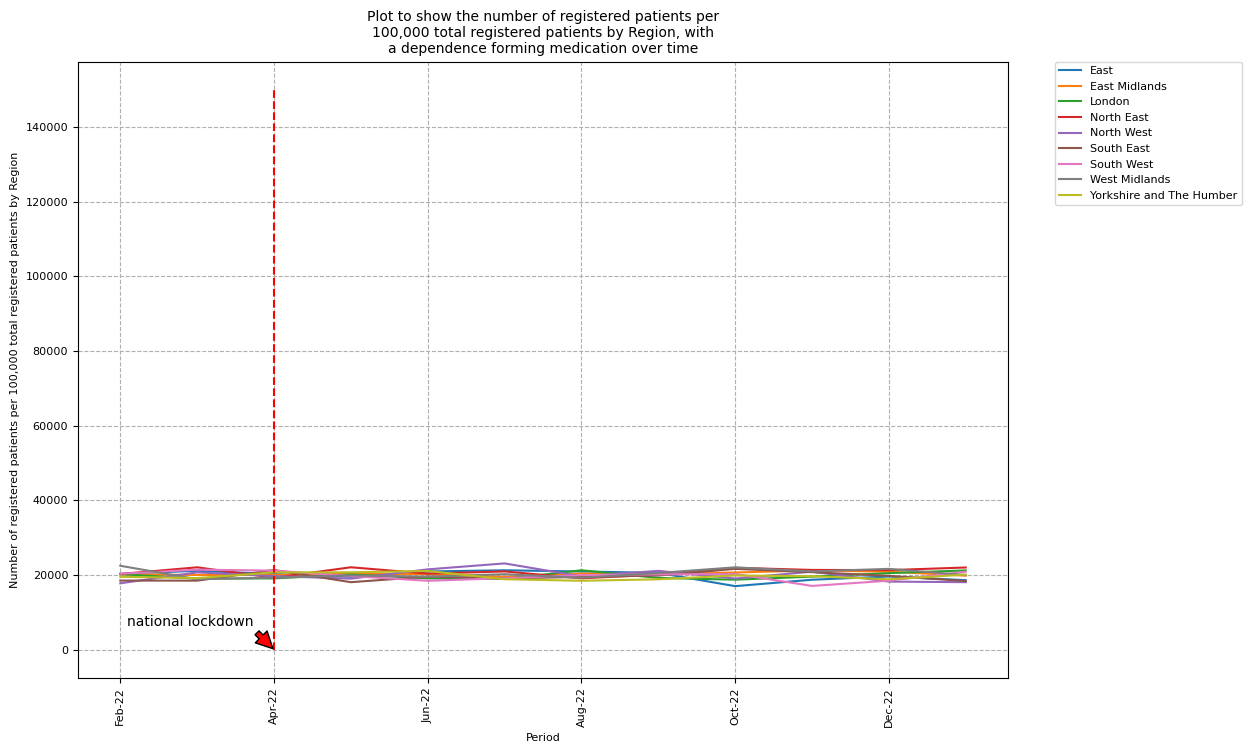

In [9]:
df_temp = pd.DataFrame(data_measure_dfm_medications_region_rate)
df_region_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_region_research_population = pd.DataFrame.pivot(df_region_research_population, index='date', columns='region', values='weighted_research_population')
df_region_research_population.index = pd.to_datetime(df_region_research_population.index).strftime('%b-%y')
ax = df_region_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=20000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [10]:
print(tabulate(df_region_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_region_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22  20327.6          20186.3   20226.9       20291.4       17793.2       18525.9       20347.2          22485.2                     19535.4
date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23  18629.3          19842.8   21235.7       22025.1       18094.3       18399.3       20898.6            20000                     20123.8


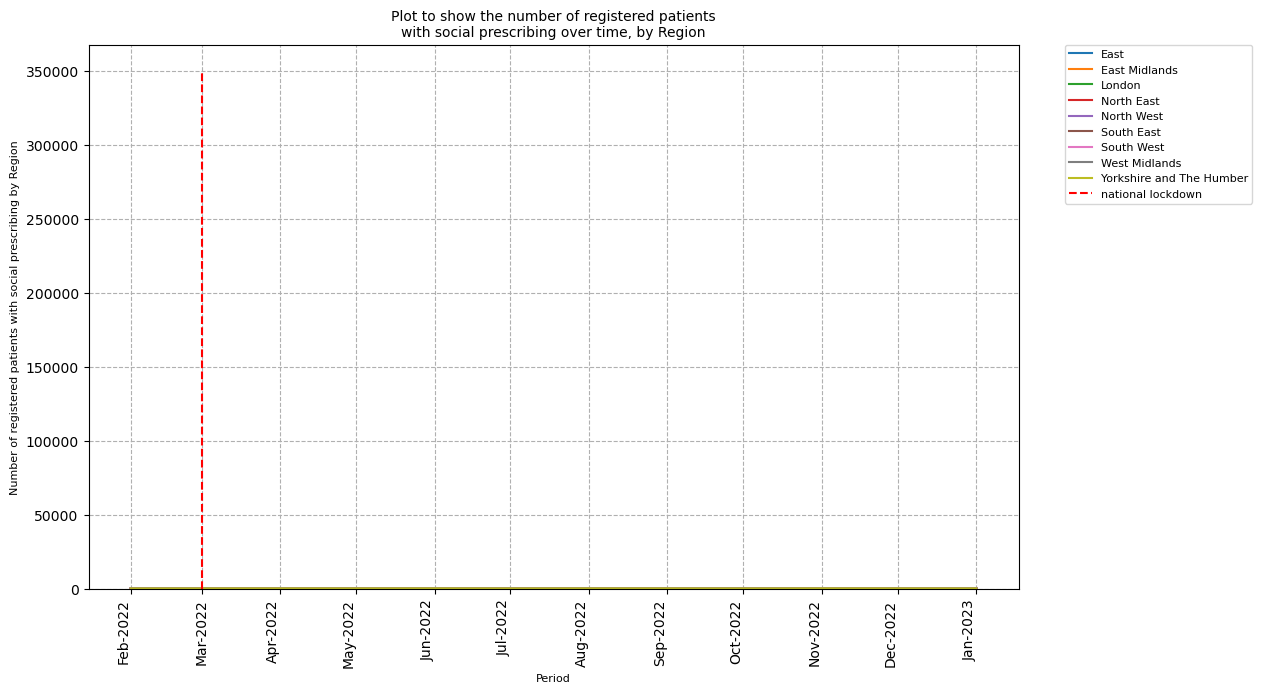

In [11]:
data_measure_social_prescribing_region_rate = pd.read_csv("../output/measure_compare_medications_by_region_socialrx_v_consultation_rate.csv", usecols=["date", "region", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_region_rate = data_measure_social_prescribing_region_rate.loc[data_measure_social_prescribing_region_rate["region"] != "nan", :]
data_measure_social_prescribing_region_rate = data_measure_social_prescribing_region_rate.loc[data_measure_social_prescribing_region_rate["with_social_prescribing"] == 1, :]
df = pd.DataFrame(data=data_measure_social_prescribing_region_rate)
df2 = df.groupby(['date', 'region']).population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by Region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=20000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [12]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00     197              185       400           211           206           205           199              228                         169
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00     216              215       401           183           212           201           182              199                         191


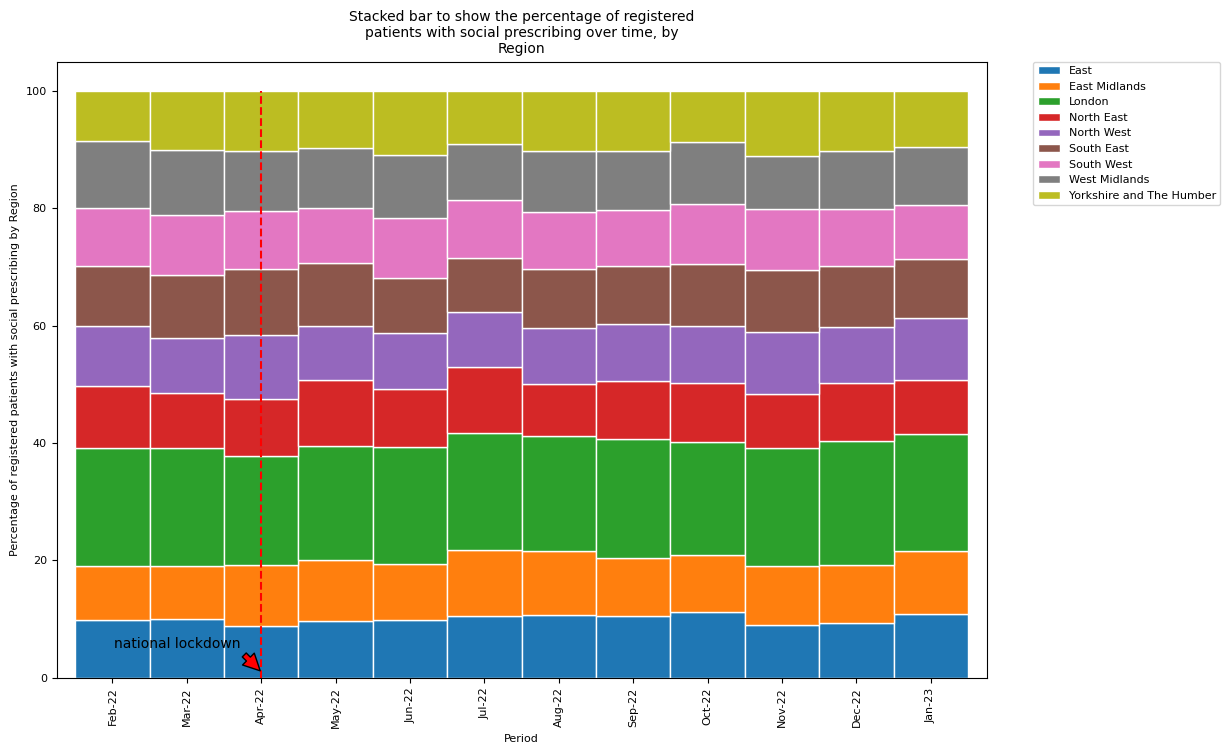

In [13]:
df_region_social_stacked = pd.DataFrame(df2)
df_region_social_stacked.head()
df_region_social_stacked.index = pd.to_datetime(df_region_social_stacked.index).strftime('%b-%y')
totrs = df_region_social_stacked.sum(axis=1)
perrs = df_region_social_stacked.div(totrs, axis=0).mul(100).round(2)
ax = perrs.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [14]:
print(tabulate(perrs.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrs.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22    9.85             9.25        20         10.55          10.3         10.25          9.95             11.4                        8.45
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23    10.8            10.75     20.05          9.15          10.6         10.05           9.1             9.95                        9.55


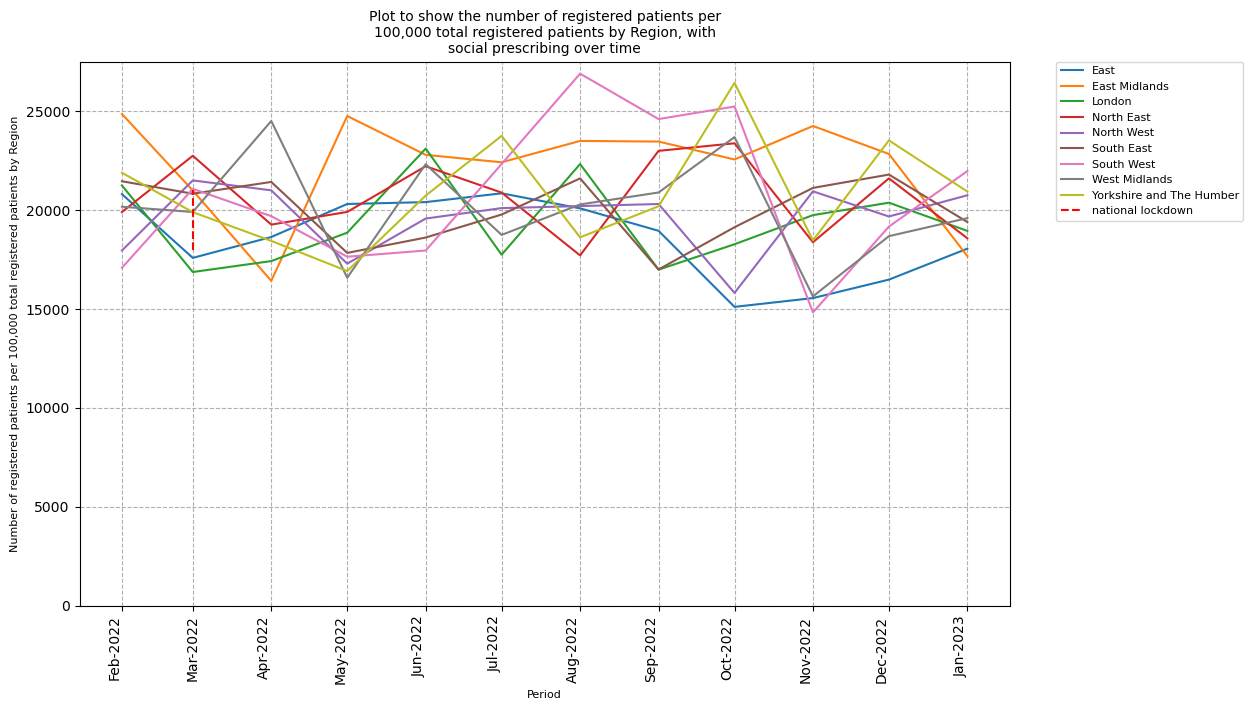

In [15]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'region']).research_population.sum().unstack() / df1.groupby(['date', 'region']).weighted_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=45000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [16]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00  20812.2          24864.9     21250       19905.2       17961.2       21463.4       17085.4          20175.4                     21893.5
date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00  18055.6          17674.4   18952.6       18579.2       20754.7         19403         21978            19598                     20942.4


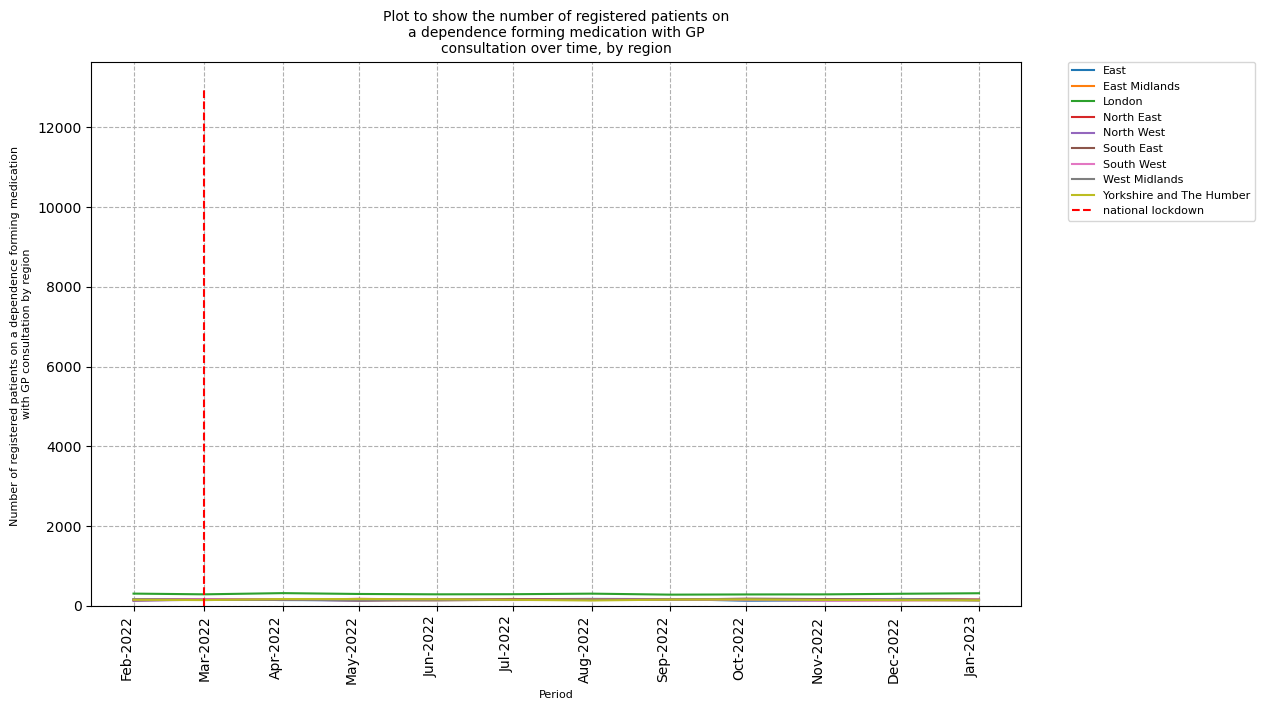

In [17]:
data_measure_consultation_region_rate = pd.read_csv("../output/measure_compare_medications_by_region_socialrx_v_consultation_rate.csv", usecols=["date", "region", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_region_rate = data_measure_consultation_region_rate.loc[data_measure_consultation_region_rate["region"] != "nan", :]
data_measure_consultation_region_rate = data_measure_consultation_region_rate.loc[data_measure_consultation_region_rate["with_consultation"] == 1, :]
df = pd.DataFrame(data=data_measure_consultation_region_rate)
df2 = df.groupby(['date', 'region']).research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=140000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [18]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00     165              142       304           148           123           137           154              162                         149
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00     149              151       313           147           131           150           148              137                         134


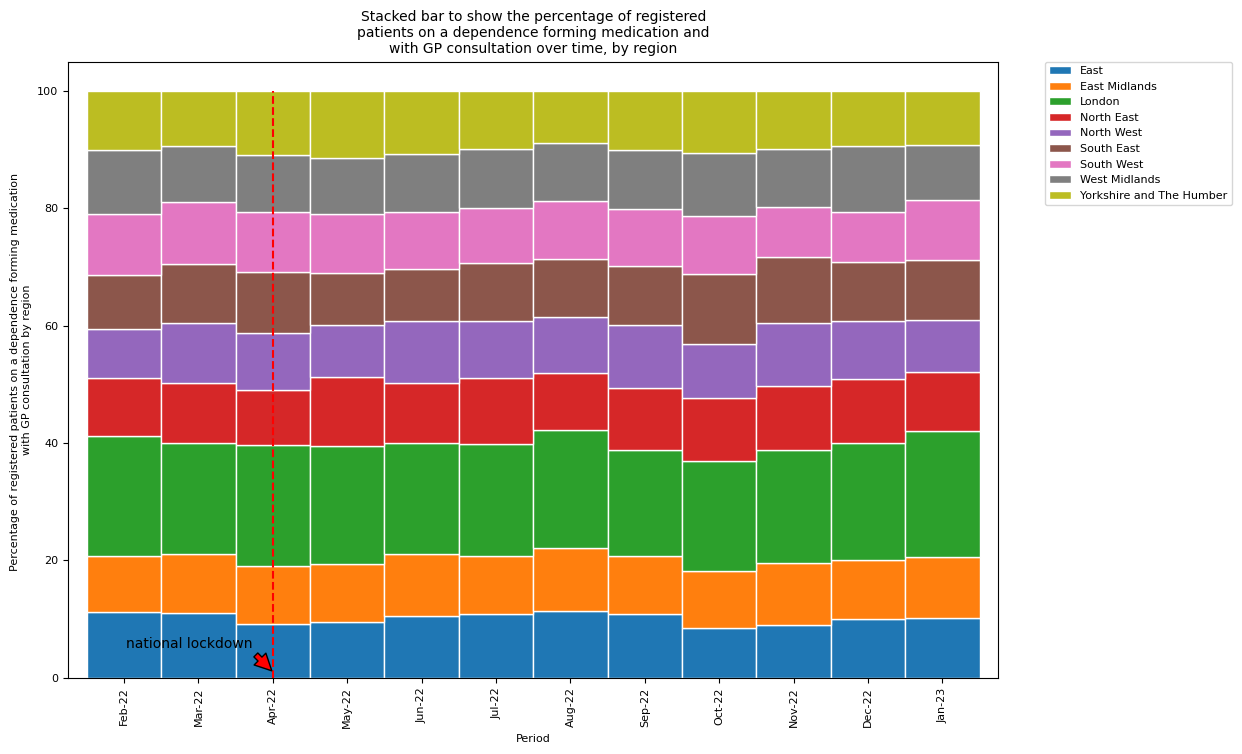

In [19]:
df_region_consult_stacked = pd.DataFrame(df2)
df_region_consult_stacked.head()
df_region_consult_stacked.index = pd.to_datetime(df_region_consult_stacked.index).strftime('%b-%y')
totrc = df_region_consult_stacked.sum(axis=1)
perrc = df_region_consult_stacked.div(totrc, axis=0).mul(100).round(2)
ax = perrc.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [20]:
print(tabulate(perrc.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrc.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22   11.12             9.57     20.49          9.97          8.29          9.23         10.38            10.92                       10.04
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23   10.21            10.34     21.44         10.07          8.97         10.27         10.14             9.38                        9.18


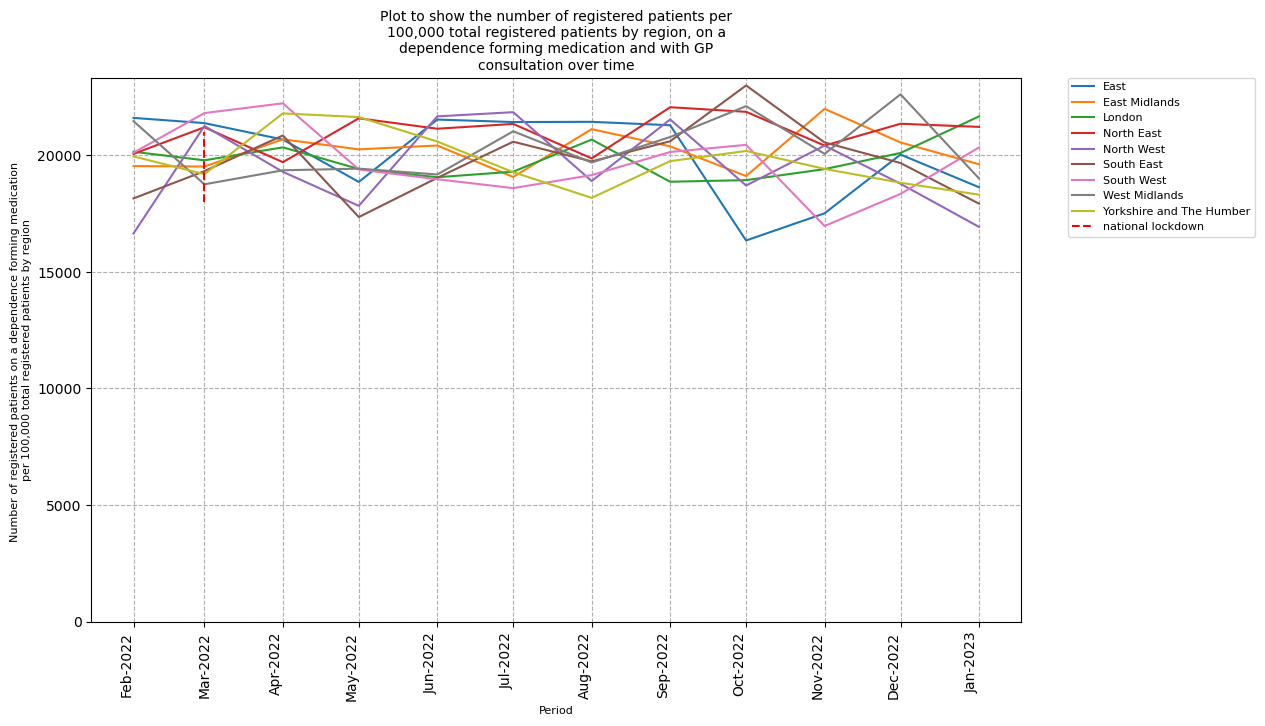

In [21]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'region']).research_population.sum().unstack() / df1.groupby(['date', 'region']).weighted_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=35000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by region, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [22]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00  21596.9          19532.3   20145.8       20054.2       16644.1       18145.7       20104.4            21457                     19946.5
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00   18625          19610.4   21660.9       21212.1       16925.1       17921.1       20329.7          19001.4                       18306
